## 1. Introduction

For this project had to choose a dataset of choice and using the concepts learnt in the lectures use this dataset to answer questions we would want to know from this set. I selected the Titanic Data Set as I had fond memories watching the movie when I was a kid. The data was obtained from Kaggle and had the characteristics of a sample of the passengers on the Titanic, including whether they survived or not, gender, age, siblings / spouses, parents and children, fare (cost of ticket), embarkation port.

link - https://www.kaggle.com/c/titanic/data

After looking at the contents of the dataset, I thought it would be interesting to look at the following questions:

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. Where did the passengers come from?
3. Who was alone and who was with family?
4. What factors helped someone survive the sinking?


In [2]:
# Calling all the regular imports we will be requiring for 
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2. Read the raw data from CSV

In [3]:
# Read csv into Pandas Dataframe and store in dataset variable
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Looking at some statistics
titanic_df.describe()

C:\Users\PrasadPagade\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Before proceeding ahead, lets understand what variables are there in this dataset -
VARIABLE DESCRIPTIONS:
1. survival --       Survival (0 = No; 1 = Yes)
2. pclass  --        Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name    --        Name
4. sex     --        Sex
5. age      --       Age
6. sibsp    --       Number of Siblings/Spouses Aboard
7. parch    --       Number of Parents/Children Aboard
8. ticket   --       Ticket Number
9. fare      --      Passenger Fare
10. cabin     --      Cabin
11. embarked   --     Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
- Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

- Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

- Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent:   Mother or Father of Passenger Aboard Titanic
- Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## Data Cleaning

Before working with the data, we check if there are any missing values that we may need to address before proceeding with our analysis

### 1. Missing Values

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


After printing out the dataset information above, we can see that the Age, Cabin and Embarked columns are missing entries. The ratio of these missing values is **0.8,0.22 and 0.99** respectively .As the Cabin column is not relevant to the analysis of the data I will be removing that column however I will need to find a way update populate the missing ages and embarked port.

In case of AGE, we are not interested in descriptive statistics, we simply want to build a good predictor. I will simply remove those passengers that are missing an age. This will not affect our analysis rather than putting an average value for missing ages.

In [6]:
Age = titanic_df['Age'].dropna()

print Age.count()

print Age.mean()



714
29.6991176471


Thus, we will use this **Age** object to do any further analysis with respect to age of the passengers on Titanic.

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Now lets take care of the missing values in Embarked column. Since there are only **2** missing values. We can replace these with the Mode of Embarked column which is "Southampton"

In [8]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
titanic_df['Embarked'].mode()

0    S
dtype: object

We will replace the missing values by mode of the embarked column which is "S"

In [10]:
titanic_df['Embarked'].fillna('S', inplace = True)

## 3. Mapping data for better reading

- To bring better readability to our visualizations we need map some of the columns so that they are easier to understand.

We will map the below columns as follows:

**1. survival   -     Survival (0 = Perished; 1 = Survived)**

**2. pclass     -     Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)** 

**3. Embarked -      changed to name of embarkation port (C = Cherbourg; Q = Queenstown; S = Southampton) **

In [11]:
# here we map columns - Survived, Pclass and Embarked to more readable values
def map_new_values(data):
    
    #Survived mapping
    survive_dict = {0: 'Perished', 1:'Survived'}
    data['Survived_Text'] = data['Survived'].map(survive_dict)
    
    #Pclass mapping
    class_dict = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    data['Pclass'] = data['Pclass'].map(class_dict)
    
    #Embarked mapping
    embark_dict = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
    data['Embarked'] = data['Embarked'].map(embark_dict)
    
    return data

titanic_df = map_new_values(titanic_df)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Text
0,1,0,Lower Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Perished
1,2,1,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Survived
2,3,1,Lower Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Survived
3,4,1,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Survived
4,5,0,Lower Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Perished


## Data Exploration

Let us explore the data to see how we can answer our proposed questions:

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. Where did the passengers come from?
3. Who was alone and who was with family?
4. What factors helped someone survive the sinking?

**Passengers on Titanic..Lets plot some data**

** Reference - http://seaborn.pydata.org/tutorial.html**

**Lets answer question 1 - Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)**


To see the distribution of passengers by gender, we will create a count plot using Seaborn. This plot will give us an insight into how the gender was distributed on the ship.

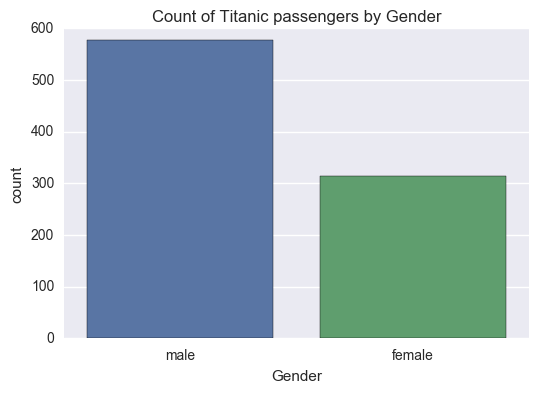

In [12]:
sns.countplot(data=titanic_df,x='Sex')
sns.plt.title('Count of Titanic passengers by Gender')
sns.plt.xlabel('Gender')

So this plot shows us that there were 577 males and 314 females on board. That's almost 2:1 ratio!

Now let's see the **gender ratio by the class**. 

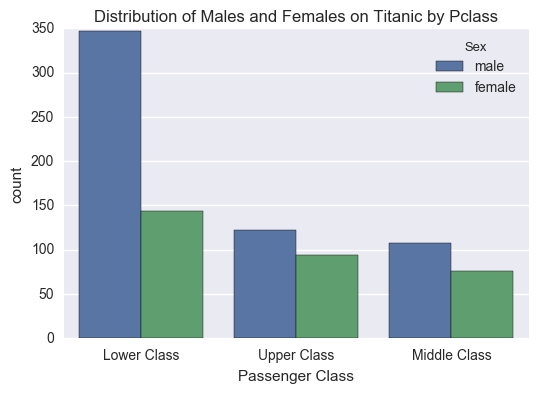

In [13]:
#Lets see the distribution of gender by Pclass
sns.countplot(data=titanic_df,x='Pclass',hue='Sex')
sns.plt.title('Distribution of Males and Females on Titanic by Pclass')
sns.plt.xlabel('Passenger Class')

Awesome, this plot gives us an insight that most males were travelling in the **lower class**

Now let's dive into the **"Sex"** column more deeper. We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column. This step will help us know how many children were on board.

In order to do that we will write a function that sorts through the Sex column and tags and passenger below the age of 16 as a child.  We'll define a new column called 'person', remember to specify axis=1 for columns and not index

In [14]:
# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [15]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Text,person
0,1,0,Lower Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Perished,male
1,2,1,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Survived,female
2,3,1,Lower Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Survived,female
3,4,1,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Survived,female
4,5,0,Lower Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Perished,male


So now we have "Person" column which split the passenger as males,females or children.

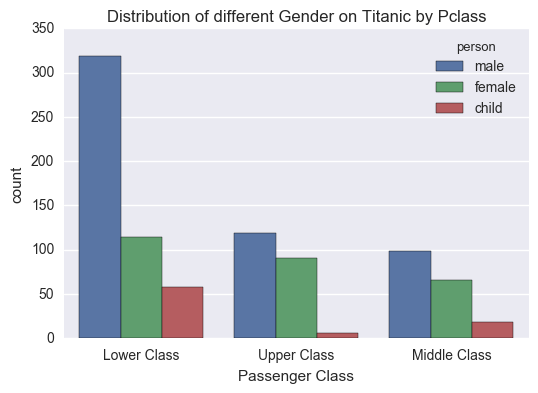

In [16]:
# Now lets try the count plot again with the new column
sns.countplot(data=titanic_df,x='Pclass',hue='person')
sns.plt.title('Distribution of different Gender on Titanic by Pclass')
sns.plt.xlabel('Passenger Class')

We observe that a lot of males passengers were present in the Lower Class

Now lets explore the age of the people who were travelling

In [17]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

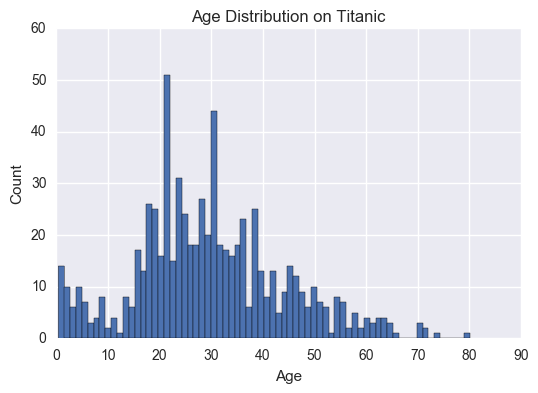

In [18]:
# Age 

Age.hist(bins=70)
plt.title('Age Distribution on Titanic')
plt.xlabel('Age')
plt.ylabel('Count')


This histogram tells us that majority of the passengers travelling were between 20 - 30. The mean age was 29. The fact that we have missing ages for 177 men and women could have skewed some numbers. But since we are not doing any descriptive statistics this visualization represents a good insight to the age group of people travelling on board.

Now lets try to answer the 2nd question - **Where did the passengers come from?**


Note that we converted the **Embarked column** to their actual names in the Data Cleaning process

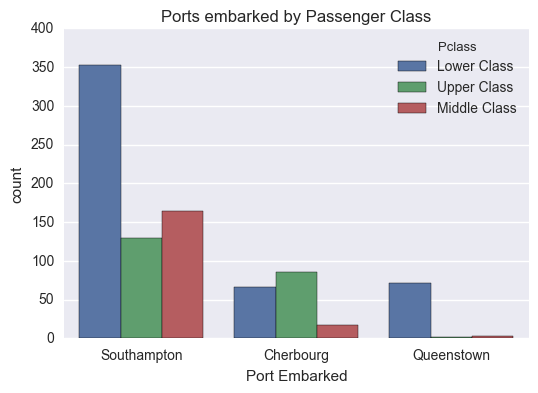

In [19]:
# Lets see from which place passengers embarked the ship
sns.countplot(data=titanic_df,x='Embarked',hue='Pclass')
sns.plt.title('Ports embarked by Passenger Class')
sns.plt.xlabel('Port Embarked')

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Now lets tackle the **3rd question - Who was alone and who was with family?**

- Let's start by adding a new column to define alone

- We'll add the parent/child column with the sibsp column

In [20]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [21]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# This warning message is trying to tell that I am modyfying on the slice of DataFrame which 
# may affect the original DataFrame. I guess that's what I want.

C:\Users\PrasadPagade\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
#Making sure if the Alone column was populated
titanic_df.head()

titanic_df['Survived'].count()


891